In [2]:
# load the libraries
library(ggplot2, quietly = TRUE)
library(data.table,quietly = TRUE)
library(magrittr, quietly = TRUE)
library(reshape2, quietly = TRUE)
library(dplyr, quietly = TRUE)
library(zoo, quietly = TRUE)

In [9]:
# load the data
dtDataLoader <- function(cPathCsv) {
  dtData <- read.csv(file = cPathCsv, stringsAsFactors = FALSE) %>%
    data.table::as.data.table()
  dtData <- dtData[, list(Data, Zamkniecie, Wolumen)] 
  setnames(x = dtData, old = c("Data", "Zamkniecie", "Wolumen"), 
           new = c("date", "close_price", "volume"))
  dtData[, date := as.Date(dtData[, date, ], format = "%Y-%m-%d"), ]
  return(dtData)
}
dtSpx <- dtDataLoader(cPathCsv = file.path(getwd(), "data", "spx_d.csv"))
dtDjia <- dtDataLoader(cPathCsv = file.path(getwd(), "data", "djia_d.csv"))
dtDjta <- dtDataLoader(cPathCsv = file.path(getwd(), "data", "djta_d.csv"))

In [10]:
# 1. look at the S&P 500 and QEs
plotSpxDaily <- ggplot2::ggplot(data = dtSpx) + 
  ggplot2::aes(x = date, y = close_price) +
  ggplot2::geom_line() +
  ggplot2::theme_bw() +
  ggplot2::xlab(label = "Time") +
  ggplot2::ylab(label = "index value in points") +
  ggplot2::ggtitle(label = "S&P 500 index [daily]", 
                   subtitle = "Stooq.pl data, scope: 1 Jan 2007 - 31 Dec 2018") +
  ggplot2::theme(plot.title = ggplot2::element_text(hjust = 0.5, size = 14), 
                 plot.subtitle = ggplot2::element_text(hjust = 0.5, size = 10)) +
  ggplot2::geom_vline(xintercept = as.double(as.Date("2008-09-15", format = "%Y-%m-%d")), 
                      size = 0.5, color = "red") +
  ggplot2::annotate(geom = "text", label = "Lehman Brothers \n bankruptcy",
                    x = as.Date("2008-09-20", format = "%Y-%m-%d"), 
                    y = 1750.0) +
  ggplot2::geom_vline(xintercept = as.double(as.Date("2008-11-26", 
                                                     format = "%Y-%m-%d")), 
                      size = 0.5, color = "blue") + 
  ggplot2::geom_vline(xintercept = as.double(as.Date("2010-06-30", 
                                                     format = "%Y-%m-%d")),
                      size = 0.5, color = "blue") +
  ggplot2::annotate("rect", xmin = as.Date("2008-11-26", format = "%Y-%m-%d"), 
                    xmax = as.Date("2010-06-30", format = "%Y-%m-%d"),
                    ymin = 0, ymax = 3000, alpha = 0.2, fill = "blue") +
  ggplot2::ylim(c(0, 3000)) +
  ggplot2::annotate(geom = "text", label = "QE1", 
                    x = as.Date("2009-10-01", format = "%Y-%m-%d"), 
                    y = 2500, size = 7) + 
  ggplot2::geom_vline(xintercept = as.double(as.Date("2010-11-01", 
                                                     format = "%Y-%m-%d")),
                      size = 0.5, color = "blue") + 
  ggplot2::geom_vline(xintercept = as.double(as.Date("2011-06-30", format = "%Y-%m-%d")), 
                      size = 0.5, color = "blue") +
  ggplot2::annotate(geom = "rect", 
                    xmin = as.Date("2010-11-01", format = "%Y-%m-%d"), 
                    xmax = as.Date("2011-06-30", format = "%Y-%m-%d"), 
                    ymin = 0, 
                    ymax = 3000, alpha = 0.2, fill = "blue") +
  ggplot2::annotate(geom = "text", 
                    x = as.Date("2011-03-15", format = "%Y-%m-%d"), 
                    y = 300, label = "QE2", size = 7) + 
  ggplot2::geom_vline(xintercept = as.double(as.Date("2012-09-13", 
                                                     format = "%Y-%m-%d")),
                      size = 0.5, color = "blue") + 
  ggplot2::geom_vline(xintercept = as.double(as.Date("2013-06-19", format = "%Y-%m-%d")), 
                      size = 0.5, color = "blue") +
  ggplot2::annotate(geom = "rect", 
                    xmin = as.Date("2012-09-13", format = "%Y-%m-%d"), 
                    xmax = as.Date("2013-06-19", format = "%Y-%m-%d"), 
                    ymin = 0, 
                    ymax = 3000, alpha = 0.2, fill = "blue") +
  ggplot2::annotate(geom = "text", 
                    x = as.Date("2013-01-15", format = "%Y-%m-%d"), 
                    y = 1000, label = "QE3", size = 7)


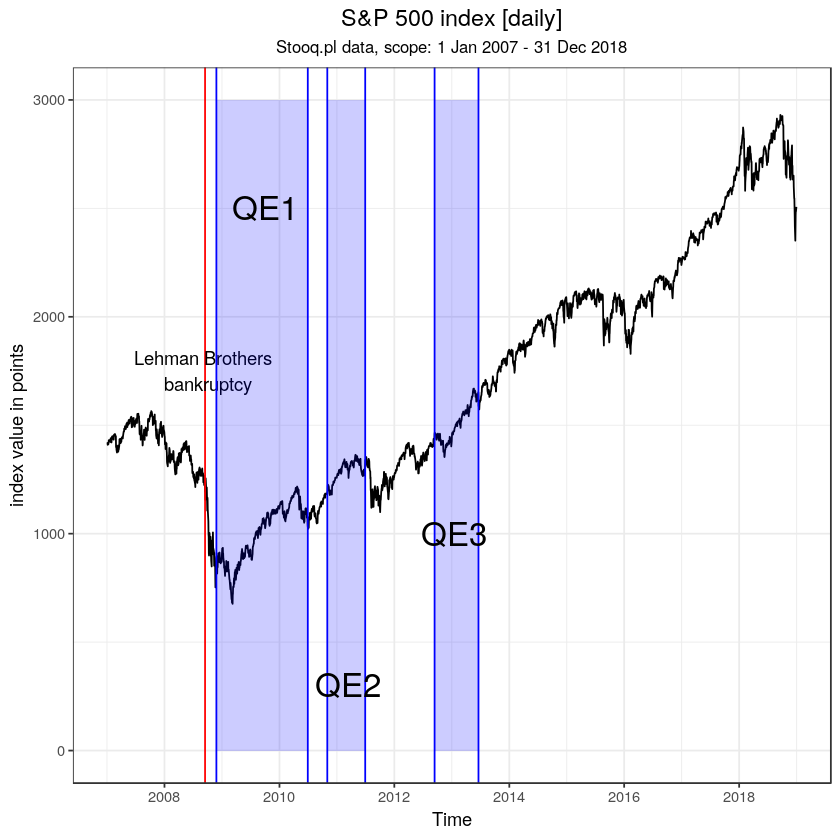

In [11]:
plotSpxDaily

Warning message:
“Removed 248 rows containing missing values (geom_path).”

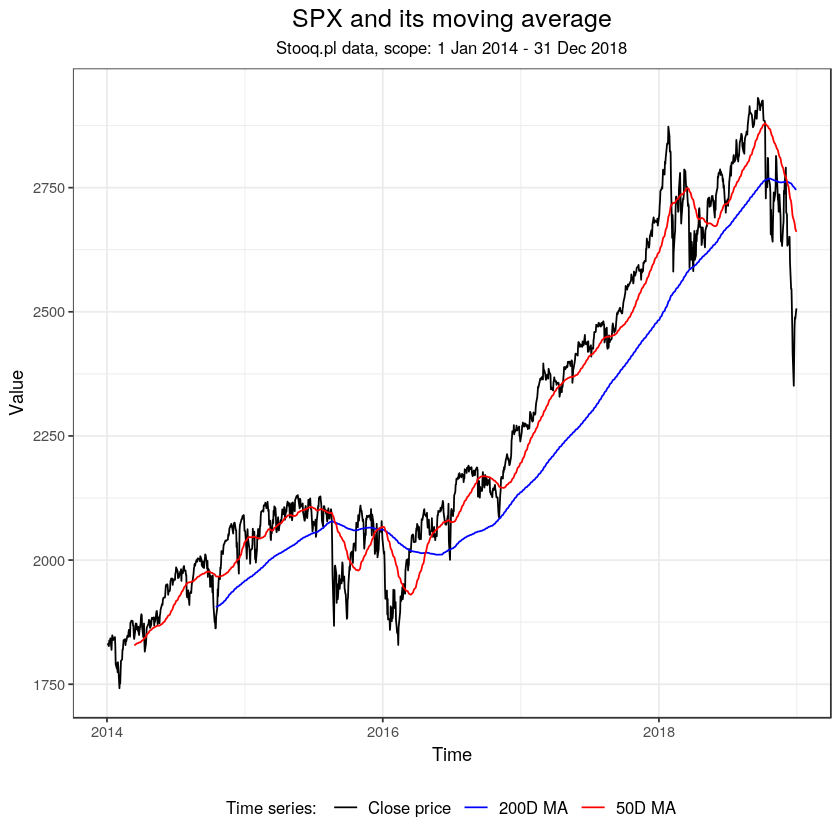

In [14]:
# 2. look at the years 2014-2018: 200D and 50D moving averages
# calculate 200-days and 50-days moving averages: Death Cross
dtSpxRecent <- dtSpx[date >= as.Date("2014-01-01", format = "%Y-%m-%d"), ]
dtSpxRecent[, rollmean200D := c(rep(NA, 199L), 
                                zoo::rollmean(dtSpxRecent[, close_price], k=200))]
dtSpxRecent[, rollmean50D := c(rep(NA, 49L), 
                               zoo::rollmean(dtSpxRecent[, close_price], k = 50))]
dtSpxRecentMelted <- 
  reshape2::melt(data = dtSpxRecent, id.vars = "date", 
                 measure.vars = c("close_price", "rollmean200D", "rollmean50D"), 
                 variable.name = "time_series_name", 
                 value.name = "time_series_value")

plotSpxRecent <- ggplot2::ggplot(data = dtSpxRecentMelted) +
  ggplot2::aes(x = date, y = time_series_value, color = time_series_name) +
  ggplot2::geom_line() + ggplot2::theme_bw() +
  ggplot2::ggtitle(label = "SPX and its moving average", 
                   subtitle = "Stooq.pl data, scope: 1 Jan 2014 - 31 Dec 2018") +
  ggplot2::xlab(label = "Time") + ggplot2::ylab(label = "Value") +
  ggplot2::theme(legend.position = "bottom", 
                 plot.title = ggplot2::element_text(hjust = 0.5, size = 15), 
                 plot.subtitle = ggplot2::element_text(hjust = 0.5, size = 10), 
                 legend.title = ggplot2::element_text(size = 10), 
                 legend.text = ggplot2::element_text(size = 10)) +
  ggplot2::labs(color = "Time series: ") + 
  ggplot2::scale_color_manual(labels = c("Close price", "200D MA", "50D MA"),
    values = c("black", "blue", "red"))
plotSpxRecent

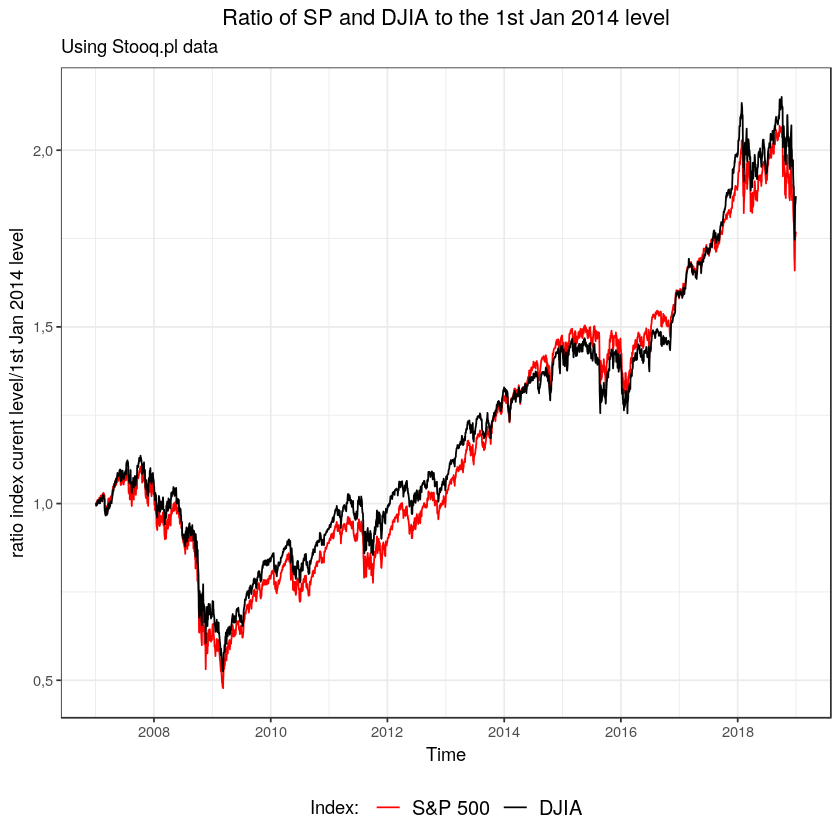

In [20]:
# comparison of DJIA and SPX: relative values
dtSpx[, SP500_ratio := dtSpx[, close_price]/dtSpx[1, close_price] , ]
dtDjia[, DJIA_ratio := dtDjia[, close_price]/dtDjia[1, close_price], ]

dtSpxDjia <- dplyr::full_join(x = dtSpx, y = dtDjia, by = c("date" = "date")) %>%
  dplyr::select(date, SP500_ratio, DJIA_ratio) %>%
  data.table::as.data.table()

#colSums(is.na(dtSpxDjia)) # no NAs
dtSpxDjia <- reshape2::melt(data = dtSpxDjia, id.vars = "date", 
                            variable.name = "variable_name", 
                            value.name = "index_level", factorsAsStrings = FALSE, 
                            measure.vars = c("SP500_ratio", "DJIA_ratio"))

plotSpxDjia <- ggplot2::ggplot(data = dtSpxDjia) +
  ggplot2::aes(x = date, y = index_level, color = variable_name) +
  ggplot2::geom_line() + ggplot2::theme_bw() +
  ggplot2::labs(color = "Index: ") +
  ggplot2::xlab(label = "Time") + 
  ggplot2::ylab(label = "ratio index curent level/1st Jan 2014 level") +
  ggplot2::ggtitle(label = "Ratio of SP and DJIA to the 1st Jan 2014 level", 
                   subtitle = "Using Stooq.pl data") +
  ggplot2::scale_color_manual(labels = c("S&P 500", "DJIA"), values = c("red", "black")) +
  ggplot2::theme(legend.position = "bottom",
                 legend.text = ggplot2::element_text(size = 12), 
                 plot.title = ggplot2::element_text(hjust = 0.5))
plotSpxDjia

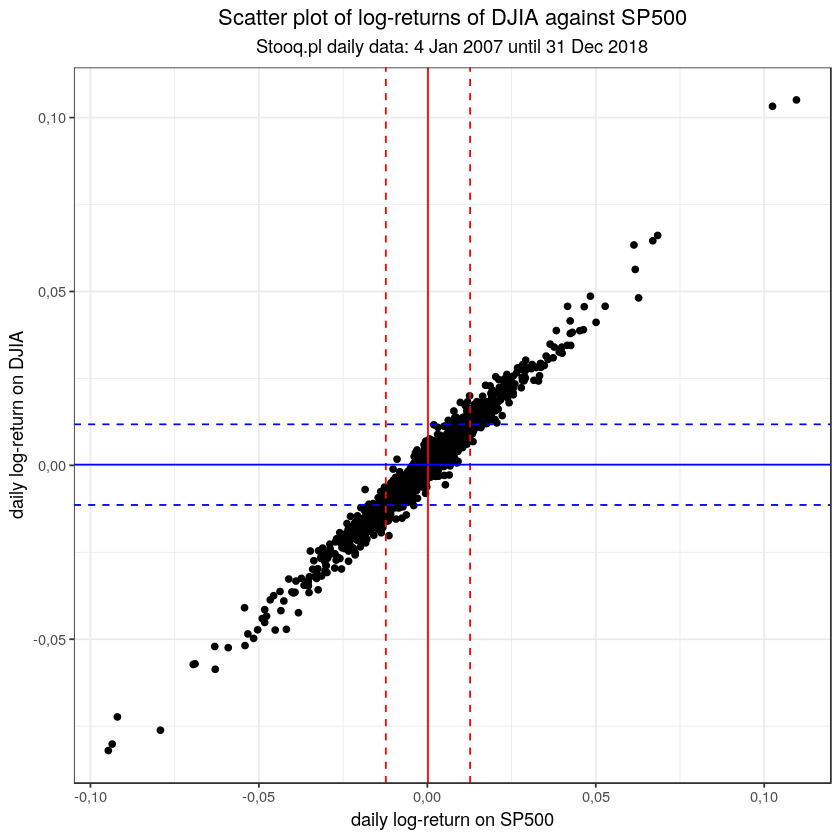

In [23]:
# comparison of log-returns
dtSpxLogRet <- dtSpx[, list(date, close_SPX = close_price), ]
dtSpxLogRet[, close_SPX_Dminus1 := lag(dtSpxLogRet[, close_SPX], 1)]
dtSpxLogRet[, close_SPX_logRet := log(close_SPX/close_SPX_Dminus1)]
dtSpxLogRet <- dtSpxLogRet[, list(date, close_SPX_logRet)]

dtDjiaLogRet <- dtDjia[, list(date, close_DJIA = close_price)]
dtDjiaLogRet[, close_DJIA_Dminuns1 := lag(dtDjiaLogRet[, close_DJIA], 1)]
dtDjiaLogRet[, close_DJIA_logRet := log(close_DJIA/close_DJIA_Dminuns1)]
dtDjiaLogRet <- dtDjiaLogRet[, list(date, close_DJIA_logRet)]

dtLogRets <- dplyr::full_join(x = dtSpxLogRet, y = dtDjiaLogRet, 
                              by = c("date" = "date")) %>%
  data.table::as.data.table()
dtLogRets <- dtLogRets[!is.na(close_SPX_logRet) & !is.na(close_DJIA_logRet), ]

avg_SPX_logret = mean(dtLogRets[, close_SPX_logRet])
std_SPX_logret = sd(dtLogRets[, close_SPX_logRet])
avg_DJIA_logret = mean(dtLogRets[, close_DJIA_logRet])
std_DJIA_logret = sd(dtLogRets[, close_DJIA_logRet])

scatter_plot_SP_DJIA <- ggplot2::ggplot(data = dtLogRets) +
  ggplot2::aes(x = close_SPX_logRet, y = close_DJIA_logRet) +
  ggplot2::geom_point(color = "black") +
  ggplot2::theme_bw() + 
  ggplot2::ggtitle(label = "Scatter plot of log-returns of DJIA against SP500", 
                   subtitle = "Stooq.pl daily data: 4 Jan 2007 until 31 Dec 2018") +
  ggplot2::theme(plot.title = ggplot2::element_text(hjust = 0.5), 
                 plot.subtitle = ggplot2::element_text(hjust = 0.5)) +
  ggplot2::xlab(label = "daily log-return on SP500") +
  ggplot2::ylab(label = "daily log-return on DJIA") +
  ggplot2::geom_vline(xintercept = avg_SPX_logret, 
                      linetype = "solid", color = "red") + 
  ggplot2::geom_vline(xintercept = avg_SPX_logret - std_SPX_logret, 
                      linetype = "dashed", color = "red") + 
  ggplot2::geom_vline(xintercept = avg_SPX_logret + std_SPX_logret, 
                      linetype = "dashed", color = "red") +
  ggplot2::geom_hline(yintercept = avg_DJIA_logret, 
                      linetype = "solid", color = "blue") + 
  ggplot2::geom_hline(yintercept = avg_DJIA_logret - std_DJIA_logret, 
                      linetype = "dashed", color = "blue") + 
  ggplot2::geom_hline(yintercept = avg_DJIA_logret + std_DJIA_logret, 
                      linetype = "dashed", color = "blue")
scatter_plot_SP_DJIA